<a href="https://colab.research.google.com/github/thuyzy/K214061753_ProjectT/blob/main/Final_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Librabry and Data**

In [ ]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_data = pd.read_excel("/content/drive/Shareddrives/Của riêng tớ thôi/Business Web Development/Đồ án cá nhân T/Data/satisfaction.xlsx")
df_data

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,119211,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,...,1,3,2,3,3,1,2,1,174,172.0
129877,125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,...,2,4,4,3,4,2,3,2,155,163.0
129878,251,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,...,2,3,3,2,3,2,1,2,193,205.0


The data set consists of 24 columns, with a total of 129,880 rows.

**Data Preprocessing and EDA**

In [ ]:
# Clean data
df_data.drop(['id'], axis=1, inplace=True)

# Change the columns name
df_data = df_data.rename(columns={
    'satisfaction_v2': 'satisfaction',
    'Gender':'gender',
    'Customer Type': 'customer_type',
    'Age':'age',
    'Type of Travel':'type_of_travel',
    'Class':'class',
    'Flight Distance':'distance',
    'Seat comfort':'seat_comfort',
    'Departure/Arrival time convenient':'dep_val_time_convenient',
    'Food and drink':'food_drink',
    'Gate location':'gate',
    'Inflight wifi service':'wifi_service',
    'Inflight entertainment': 'entertainment',
    'Online support':'onl_support',
    'Ease of Online booking':'onl_booking_service',
    'On-board service':'onboard_service',
    'Leg room service':'leg_room_service',
    'Baggage handling':'baggage_handling',
    'Checkin service': 'checkin_service',
    'Cleanliness':'cleanliness',
    'Online boarding':'onl_boarding',
    'Departure Delay in Minutes':'dep_delay_minutes',
    'Arrival Delay in Minutes':'val_delay_minutes'})
df_data.columns

Index(['satisfaction', 'gender', 'customer_type', 'age', 'type_of_travel',
       'class', 'distance', 'seat_comfort', 'dep_val_time_convenient',
       'food_drink', 'gate', 'wifi_service', 'entertainment', 'onl_support',
       'onl_booking_service', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'cleanliness', 'onl_boarding',
       'dep_delay_minutes', 'val_delay_minutes'],
      dtype='object')

In [ ]:
#Get information of the dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   satisfaction             129880 non-null  object 
 1   gender                   129880 non-null  object 
 2   customer_type            129880 non-null  object 
 3   age                      129880 non-null  int64  
 4   type_of_travel           129880 non-null  object 
 5   class                    129880 non-null  object 
 6   distance                 129880 non-null  int64  
 7   seat_comfort             129880 non-null  int64  
 8   dep_val_time_convenient  129880 non-null  int64  
 9   food_drink               129880 non-null  int64  
 10  gate                     129880 non-null  int64  
 11  wifi_service             129880 non-null  int64  
 12  entertainment            129880 non-null  int64  
 13  onl_support              129880 non-null  int64  
 14  onl_

Dataset analysis

In [ ]:
#Numerical features

num_features = [ features for features in df_data.columns if df_data[features].dtype != 'object' ]
print('Number of numerical features: ', len(num_features),"\n", num_features)
df_data.describe().T

Number of numerical features:  18 
 ['age', 'distance', 'seat_comfort', 'dep_val_time_convenient', 'food_drink', 'gate', 'wifi_service', 'entertainment', 'onl_support', 'onl_booking_service', 'onboard_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'cleanliness', 'onl_boarding', 'dep_delay_minutes', 'val_delay_minutes']


,count,mean,std,min,25%,50%,75%,max
age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
seat_comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
dep_val_time_convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
food_drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
gate,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
wifi_service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
onl_support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
onl_booking_service,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [ ]:
#Categorical features

cat_features = [ feature for feature in df_data.columns if df_data[feature].dtype=='object']
print('Number of categorical features: ', len(cat_features),"\n", cat_features)
df_data.describe (exclude=['float','int64'])

Number of categorical features:  5 
 ['satisfaction', 'gender', 'customer_type', 'type_of_travel', 'class']


,satisfaction,gender,customer_type,type_of_travel,class
count,129880,129880,129880,129880,129880
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,71087,65899,106100,89693,62160


In [ ]:
#Check and treat missing value
df_data.isna().sum().sort_values(ascending=False)
df_data['val_delay_minutes'].fillna(df_data['val_delay_minutes'].mean(),inplace=True)

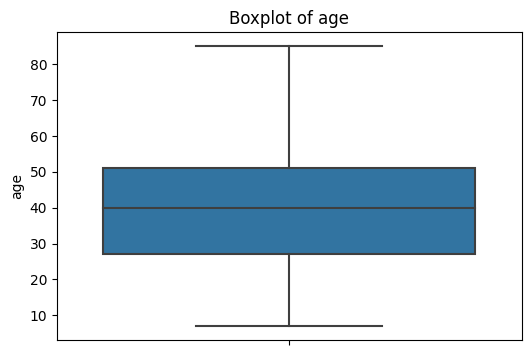

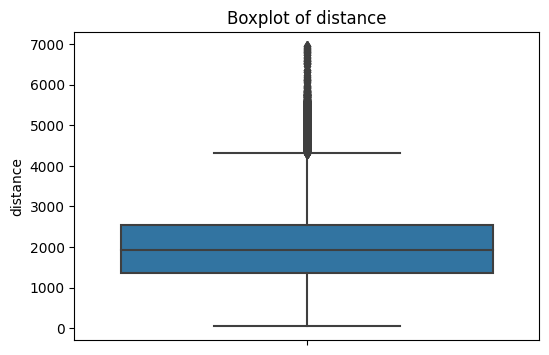

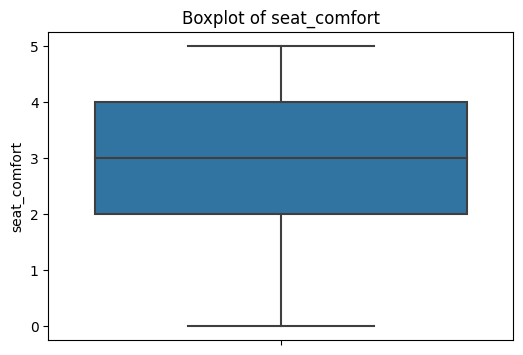

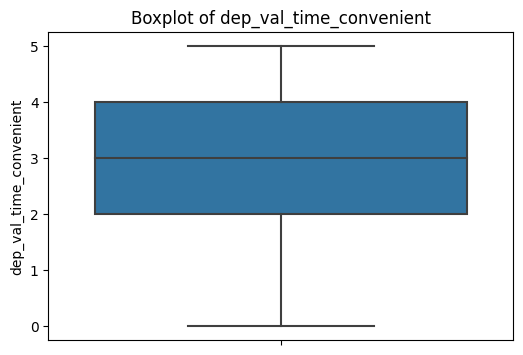

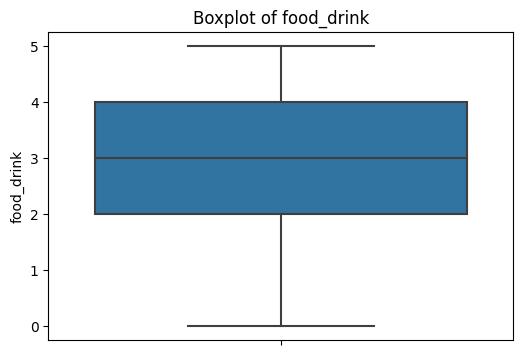

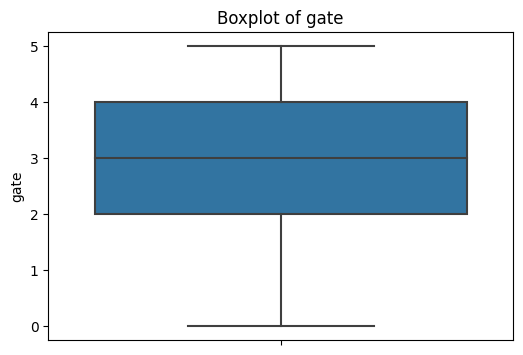

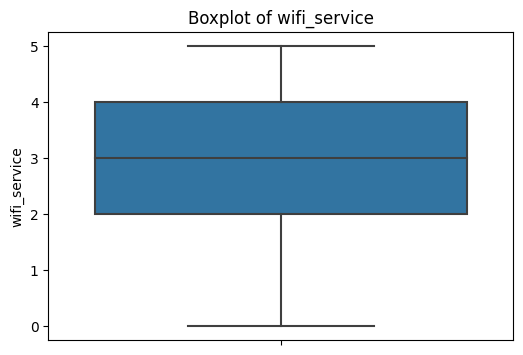

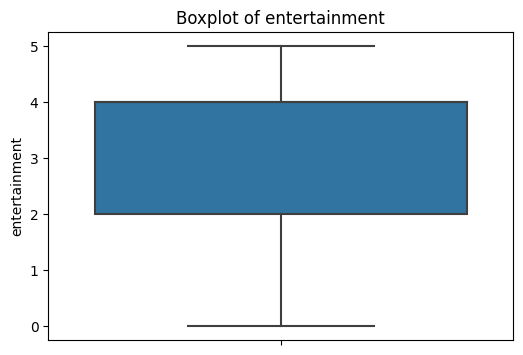

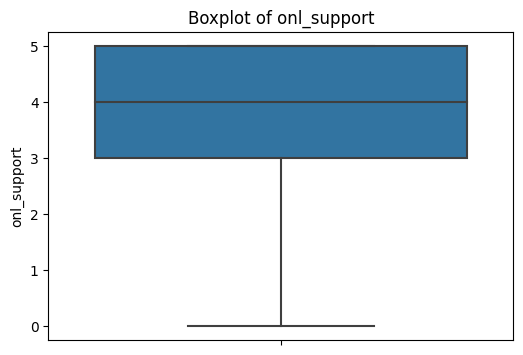

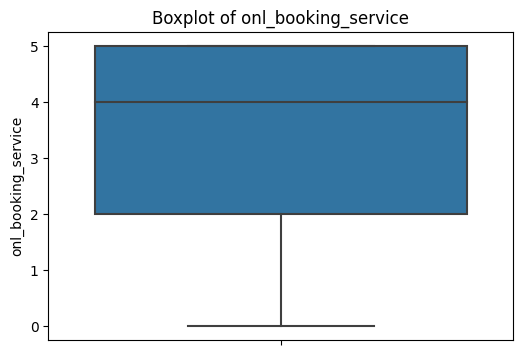

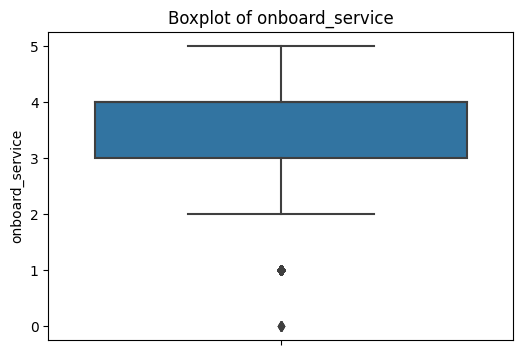

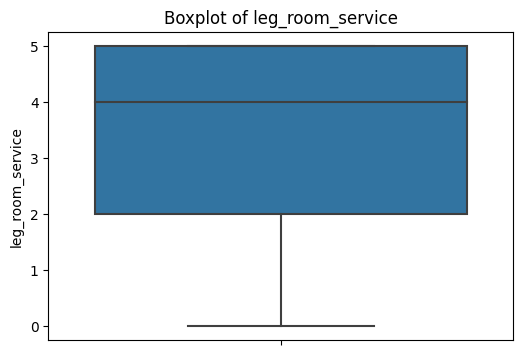

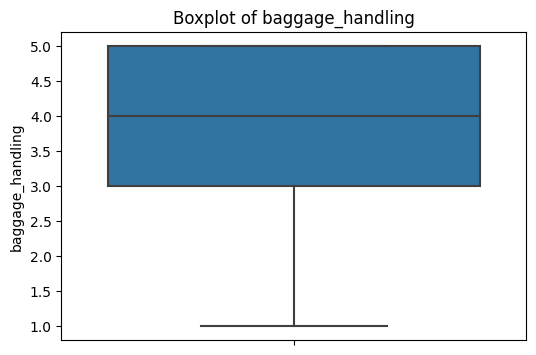

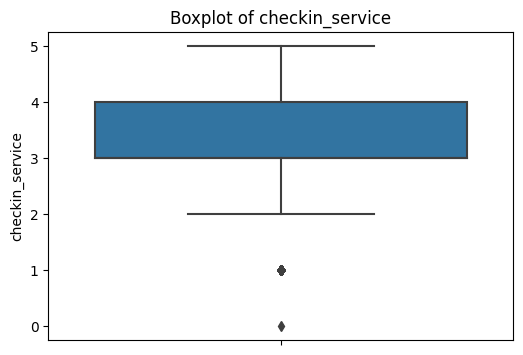

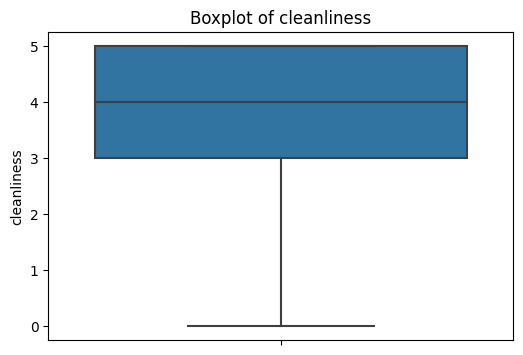

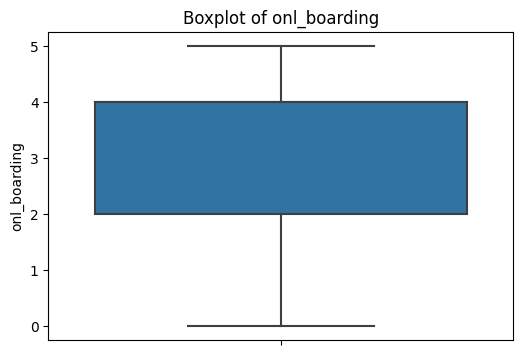

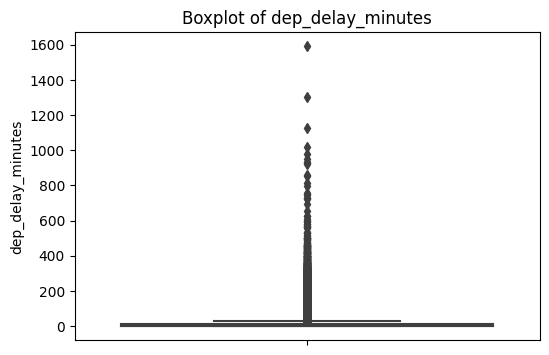

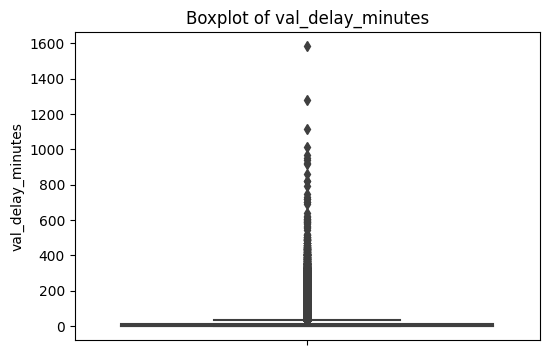

In [ ]:
#List of columns to be checked
check = ['age','distance','seat_comfort','dep_val_time_convenient','food_drink','gate','wifi_service','entertainment','onl_support',
       'onl_booking_service','onboard_service','leg_room_service','baggage_handling','checkin_service','cleanliness','onl_boarding',
       'dep_delay_minutes','val_delay_minutes']

# Create a function to count the number of outliers

def count_outliers_iqr(data, column, threshold=1.5):
  Q1= np.percentile(data[column],25)
  Q3= np.percentile(data[column],75)
  IQR= Q3-Q1
  lower_bound= Q1-threshold * IQR
  upper_bound= Q3+ threshold * IQR
  outliers= (data[column]< lower_bound)| (data[column]> upper_bound)
  return outliers.sum()

count_outliers_iqr(df_data,check, threshold=1.5)

#Detect outlier data

#Loop through the selected columns
for col in check:
  plt.figure(figsize=(6,4))
  sns.boxplot(data=df_data, y=col)
  plt.title(f'Boxplot of {col}')
  plt.ylabel(col)
  plt.show()

In [ ]:
df_data['satisfaction'] = df_data['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})

<ipython-input-14-7d5400cf45f7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_data.corr(), annot = True, fmt = '0.2f', cmap="hot")


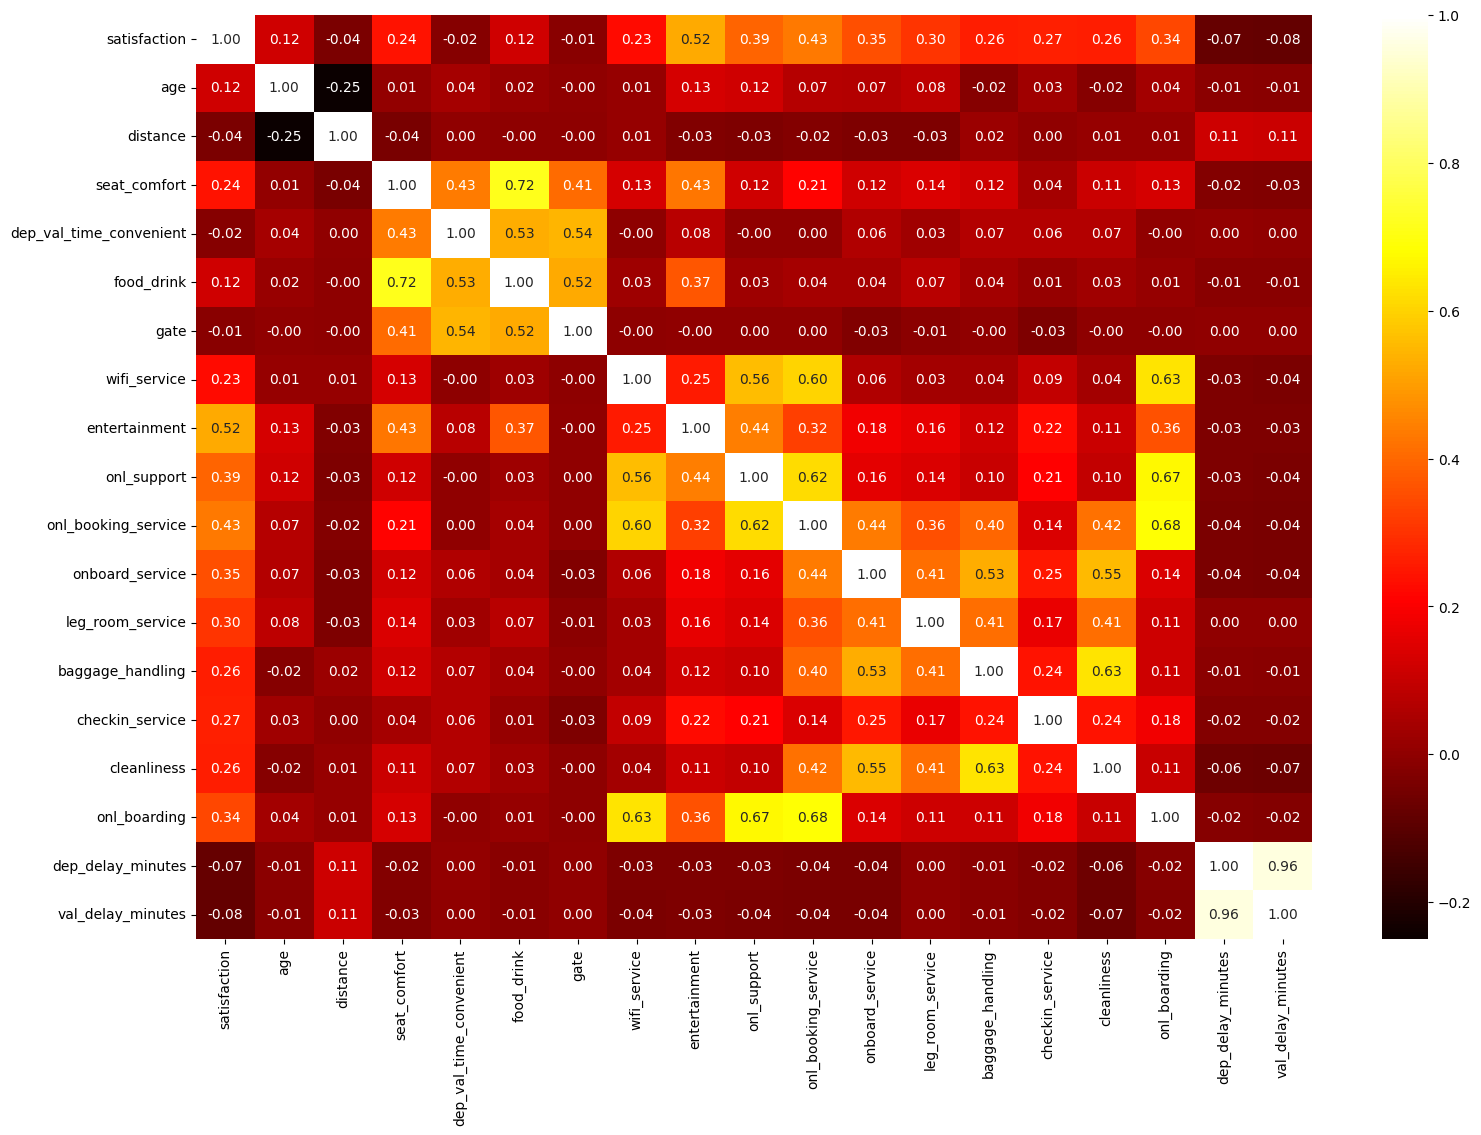

In [ ]:
plt.figure(figsize = (18, 12))
sns.heatmap(df_data.corr(), annot = True, fmt = '0.2f', cmap="hot")
plt.show()

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129880, dtype: int64


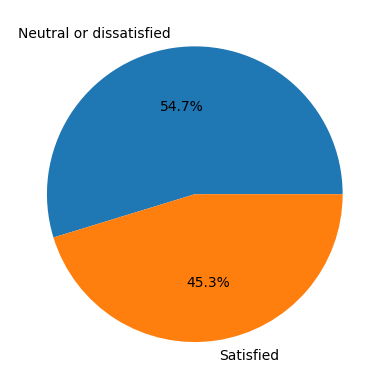

In [ ]:
print(df_data['satisfaction'])
df_data['satisfaction'].value_counts()

#Draw piechart
plt.pie(df_data.satisfaction.value_counts(),
        labels = ["Neutral or dissatisfied", "Satisfied"],autopct = '%1.1f%%')
        # colors = sns.color_palette("YlOrBr"), )
pass

In [ ]:
df_data['customer_type'] = df_data['customer_type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df_data['type_of_travel'] = df_data['type_of_travel'].map({'Personal Travel':0, 'Business travel':1})
df_data['class'] = df_data['class'].map({'Eco':0, 'Eco Plus':1, 'Business':2})
df_data['gender'] = df_data['gender'].map({'Male':0, 'Female':1})

**Data Sampling**

In [ ]:
#Split data
target = 'satisfaction'
X = df_data.drop('satisfaction', axis = 1)
y = df_data[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipeline = Pipeline([
            ('std_scaler',StandardScaler()),
                    ])
scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_test = pipeline.transform(X_test)

In [ ]:
print("Number of data training:", len(X_train))
print("Number of data testing:", len(X_test))

Number of data training: 103904
Number of data testing: 25976


**Model Development**

XGBoost

In [ ]:
model_xgb = XGBClassifier()

param_grid = {
    'max_depth': [2, 3, 4, 5, 10, 12, 15, 17, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]}

grid_search = GridSearchCV(estimator = model_xgb, param_grid=param_grid, cv=5)
grid_search.fit(scaled_X_train, y_train)
# best_model = grid_search.best_estimator_
best_xgb = grid_search.best_params_
print(best_xgb)

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 400}
Kết quả sau khi chạy Grid cho XGBoost


Logistic Regression

In [ ]:
model_lg = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator= model_lg, param_grid=param_grid, cv=5)
grid_search.fit(scaled_X_train, y_train)
best_lg = grid_search.best_params_['C']
print(best_lg)

C=0.01
Kết quả sau khi chạy Grid cho Logistic Regression

Random Forest

In [ ]:
model_rf = RandomForestClassifier()

param_grid = {'max_depth': [10, 15, 17, 20, 25]}
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_params_['max_depth']
print(best_rf)

max_depth = 25

Decision Tree

In [ ]:
# model_dt = DecisionTreeClassifier()

# param_grid = {'max_depth': [5, 10, 12, 15, 20]}

# grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# best_dt = grid_search.best_params_['max_depth']
# print(best_dt)

max_depth = 15

**Prediction **

In [ ]:
#XGBoost
model_xgb = XGBClassifier(max_depth=12, learning_rate = 0.1)
model_xgb.fit(scaled_X_train,y_train)
pred_xgb = model_xgb.predict(scaled_X_test)

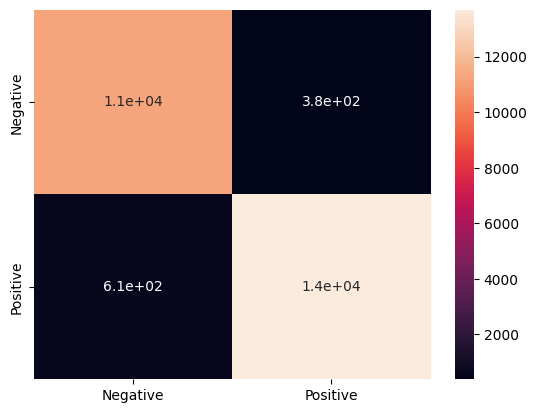

<Figure size 500x500 with 0 Axes>

In [ ]:
#Create confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.figure(figsize=(5,5))
plt.show()

In [ ]:
TP = conf_matrix_xgb[1, 1]
FP = conf_matrix_xgb[0, 1]
TN = conf_matrix_xgb[0, 0]
FN = conf_matrix_xgb[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

#print confusion matrix's value
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 13692
FP: 381
TN: 11294
FN: 609
Accuracy: 0.9618878965198645
Precision: 0.972926881261991
Recall: 0.9574155653450808
F1 Score: 0.9651089025163883


entertainment: 0.5123723745346069
seat_comfort: 0.13795322179794312
onl_booking_service: 0.06995361298322678
customer_type: 0.05528823658823967
type_of_travel: 0.033491700887680054
class: 0.025557219982147217
gender: 0.023823140189051628
gate: 0.015157302841544151
dep_val_time_convenient: 0.01447976753115654
onl_support: 0.01391453668475151
checkin_service: 0.012653054669499397
onl_boarding: 0.011601833626627922
food_drink: 0.010957006365060806
cleanliness: 0.010501650162041187
baggage_handling: 0.010377644561231136
leg_room_service: 0.010098038241267204
onboard_service: 0.00895389262586832
val_delay_minutes: 0.00583815760910511
age: 0.005289784632623196
wifi_service: 0.004390819929540157
distance: 0.0037081551272422075
dep_delay_minutes: 0.00363900326192379


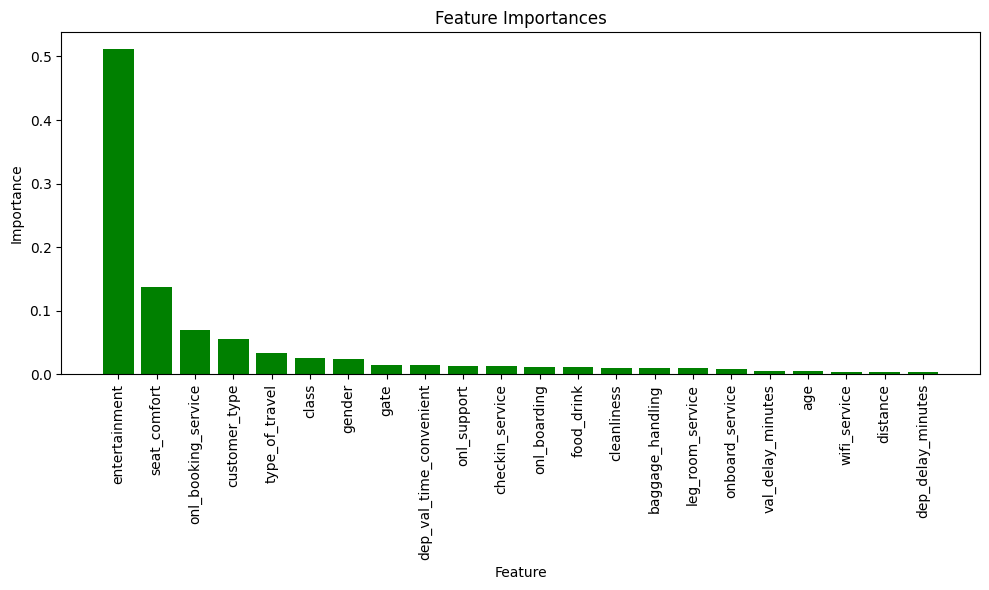

In [ ]:
# Get feature importances from the trained XGBOOST model
feature_importances = model_xgb.feature_importances_
feature_names = np.array(X_train.columns)

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[indices]
sorted_feature_names = feature_names[indices]

# Print the feature importances in descending order
for feature_name, importance in zip(sorted_feature_names, sorted_feature_importances):
    print(f"{feature_name}: {importance}")

# Plot the feature importances as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_feature_importances, color="green")
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

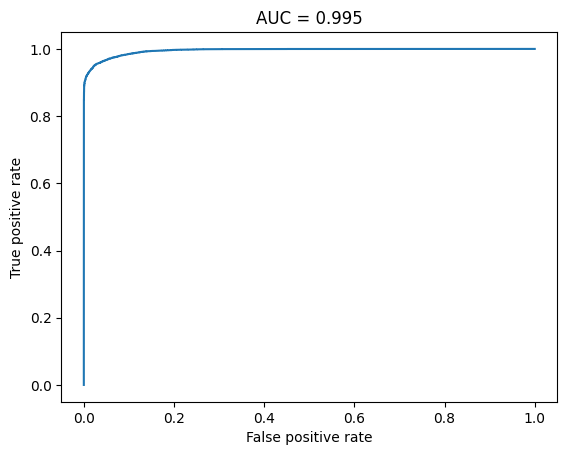

In [ ]:
from sklearn.metrics import roc_curve, auc
# Tính toán TPR và FPR
pred_xgb = model_xgb.predict_proba(scaled_X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_xgb)

# Tính toán AUC
auc = auc(fpr, tpr)

# Vẽ ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("AUC = %.3f" % auc)
plt.show()

In [ ]:
# from sklearn.metrics import roc_curve, auc
# # Tính toán TPR và FPR
# pred_log = model_log.predict_proba(scaled_X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, pred_xgb)

# # Tính toán AUC
# auc = auc(fpr, tpr)

# # Vẽ ROC curve
# plt.plot(fpr, tpr)
# plt.xlabel("False positive rate")
# plt.ylabel("True positive rate")
# plt.title("AUC = %.3f" % auc)
# plt.show()

In [ ]:
#Logistic Regression
model_log = LogisticRegression(C= 0.01, penalty="l2")
model_log.fit(scaled_X_train,y_train)
pred_log = model_log.predict(scaled_X_test)

In [ ]:
# pred_log = model_log.predict_proba(scaled_X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, pred_log)

# # Tính toán AUC
# auc = auc(fpr, tpr)

# # Vẽ ROC curve
# plt.plot(fpr, tpr)
# plt.xlabel("False positive rate")
# plt.ylabel("True positive rate")
# plt.title("AUC = %.3f" % auc)
# plt.show()

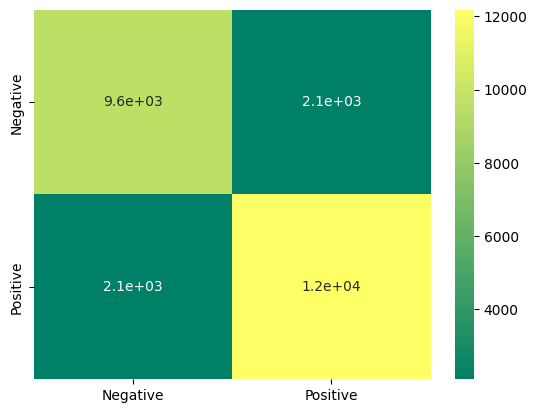

<Figure size 500x500 with 0 Axes>

In [ ]:
#Create confusion matrix
conf_matrix_log = confusion_matrix(y_test, pred_log)
sns.heatmap(conf_matrix_log, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="summer")
plt.figure(figsize=(5,5))
plt.show()

In [ ]:
TP = conf_matrix_log[1, 1]
FP = conf_matrix_log[0, 1]
TN = conf_matrix_log[0, 0]
FN = conf_matrix_log[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

#print confusion matrix's value
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 12183
FP: 2084
TN: 9591
FN: 2118
Accuracy: 0.8382352941176471
Precision: 0.8539286465269503
Recall: 0.8518984686385568
F1 Score: 0.852912349481938


<Axes: ylabel='Feature'>

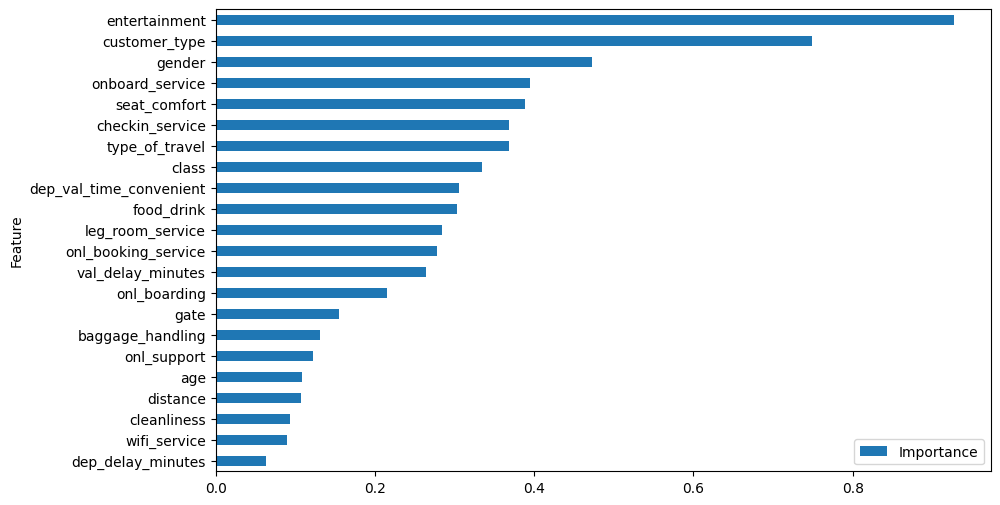

In [ ]:
coefficients = model_log.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))


# # Create a bar chart
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(feature_importances)), sorted_feature_importances)
# plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=90)
# plt.xlabel("Features")
# plt.ylabel("Importance")
# plt.title("Feature Importances")
# plt.tight_layout()

# # Show the bar chart
# plt.show()


In [ ]:
#Random Forest
model_rf = RandomForestClassifier(max_depth=25, random_state=42)
model_rf.fit(scaled_X_train,y_train)
pred_rf = model_rf.predict(scaled_X_test)

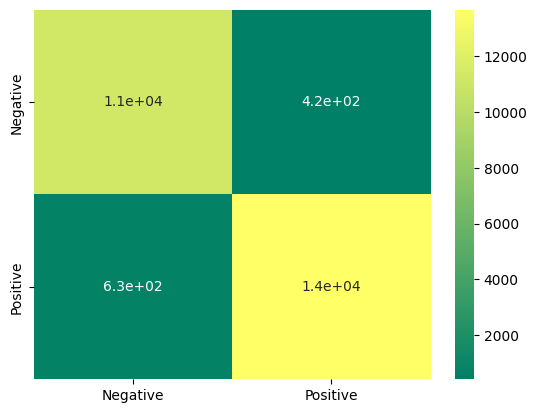

<Figure size 500x500 with 0 Axes>

In [ ]:
#Create confusion matrix
conf_matrix_rf = confusion_matrix(y_test, pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],cmap="summer")
plt.figure(figsize=(5,5))
plt.show()

In [ ]:
TP = conf_matrix_rf[1, 1]
FP = conf_matrix_rf[0, 1]
TN = conf_matrix_rf[0, 0]
FN = conf_matrix_rf[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

#print confusion matrix's value
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 13667
FP: 419
TN: 11256
FN: 634
Accuracy: 0.9594625808438558
Precision: 0.9702541530597757
Recall: 0.9556674358436473
F1 Score: 0.9629055553598478


entertainment: 0.2082416732575171
seat_comfort: 0.12427404480082264
onl_booking_service: 0.07752204090267555
onl_support: 0.06165831022488309
customer_type: 0.04663891302571358
onboard_service: 0.04622762472153103
food_drink: 0.041134873493467755
onl_boarding: 0.03818947605793403
class: 0.03646199752136062
leg_room_service: 0.03638131074196281
distance: 0.0336441437164905
age: 0.03024882939123852
gender: 0.02883314509257217
type_of_travel: 0.02732337347304886
checkin_service: 0.024914988895316865
cleanliness: 0.024502404662621633
baggage_handling: 0.023242812647878235
dep_val_time_convenient: 0.022470158878143062
gate: 0.01930359075468329
wifi_service: 0.018342509164490112
val_delay_minutes: 0.01597043163412402
dep_delay_minutes: 0.014473346941524596


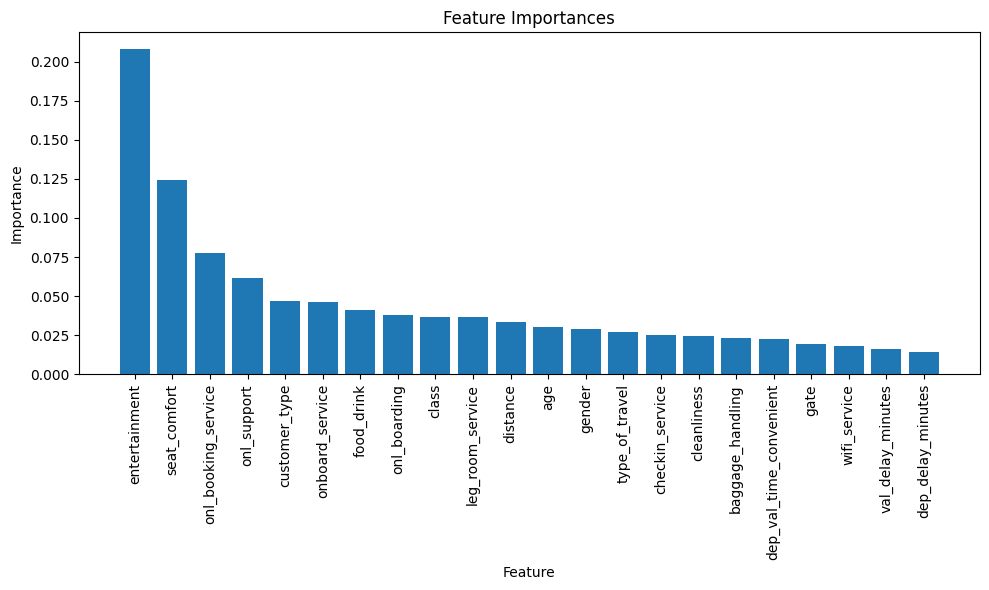

In [ ]:
# Get feature importances from the trained RF model
feature_importances = model_rf.feature_importances_
feature_names = np.array(X_train.columns)

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[indices]
sorted_feature_names = feature_names[indices]

# Print the feature importances in descending order
for feature_name, importance in zip(sorted_feature_names, sorted_feature_importances):
    print(f"{feature_name}: {importance}")

# Plot the feature importances as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_feature_importances)
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [ ]:
#Decision Tree
model_dt = DecisionTreeClassifier(max_depth = 15, random_state = 42)
model_dt.fit(scaled_X_train,y_train)
pred_dt = model_dt.predict(scaled_X_test)

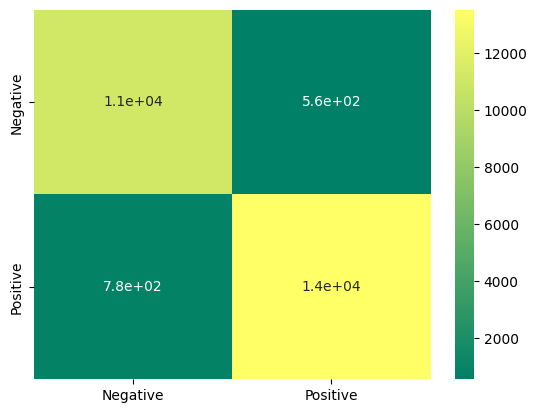

<Figure size 500x500 with 0 Axes>

In [ ]:
conf_matrix_dt = confusion_matrix(y_test, pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="summer")
plt.figure(figsize=(5,5))
plt.show()

In [ ]:
TP = conf_matrix_dt[1, 1]
FP = conf_matrix_dt[0, 1]
TN = conf_matrix_dt[0, 0]
FN = conf_matrix_dt[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

#print confusion matrix's value
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 13526
FP: 563
TN: 11112
FN: 775
Accuracy: 0.9484909146904835
Precision: 0.9600397473206047
Recall: 0.9458079854555625
F1 Score: 0.9528707291299753


entertainment: 0.4258851495303987
seat_comfort: 0.19992245915083906
onl_booking_service: 0.06884901367461158
customer_type: 0.046713498478049474
type_of_travel: 0.039691297808227055
class: 0.02295623322969568
gate: 0.02141529627590168
dep_val_time_convenient: 0.01999093024810838
onl_support: 0.017502216810707398
gender: 0.01735529877950337
checkin_service: 0.01647594453506558
cleanliness: 0.014281392100725175
distance: 0.01340600852438766
baggage_handling: 0.012850849791023949
leg_room_service: 0.011951062862004171
age: 0.011758750386597395
val_delay_minutes: 0.008592122976737677
food_drink: 0.008185242704256341
onl_boarding: 0.008149679304744655
onboard_service: 0.006582553315298774
dep_delay_minutes: 0.004706411835347503
wifi_service: 0.0027785876777686406


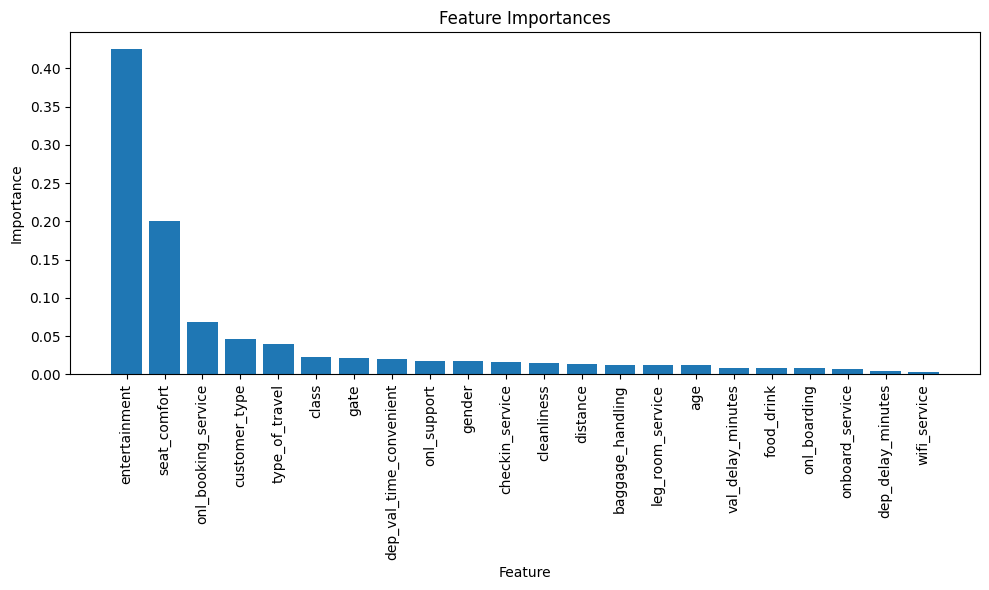

In [ ]:
# Get feature importances from the trained XGBOOST model
feature_importances = model_dt.feature_importances_
feature_names = np.array(X_train.columns)

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[indices]
sorted_feature_names = feature_names[indices]

# Print the feature importances in descending order
for feature_name, importance in zip(sorted_feature_names, sorted_feature_importances):
    print(f"{feature_name}: {importance}")

# Plot the feature importances as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_feature_importances)
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()